In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000 # 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용
)

C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(train_data[0]) # 각 리뷰는 단어 인덱스의 리스트(단어 시퀀스가 인코딩된 것)
print(train_labels[0]) # 부정(0)과 긍정(1)을 나타내는 1의 리스트

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
print(a.get('name'))
print(a.get('phone'))

pey
0119993323


In [4]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
print(reverse_word_index.get(-2))

None


In [7]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [22]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
print(x_train[0])
print(len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


In [10]:
y_train[0]

1.0

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5170 - accuracy: 0.7780 - val_loss: 0.4043 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3012 - accuracy: 0.9012 - val_loss: 0.3017 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2223 - accuracy: 0.9255 - val_loss: 0.3017 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1720 - accuracy: 0.9442 - val_loss: 0.2754 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1415 - accuracy: 0.9545 - val_loss: 0.2842 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1177 - accuracy: 0.9621 - val_loss: 0.3015 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.3159 - val_accuracy: 0.8833
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

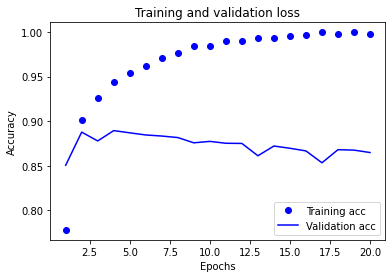

In [20]:
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.7668 - accuracy: 0.8489


[0.7667738795280457, 0.8488799929618835]

In [23]:
model.predict(x_test)

array([[0.00650245],
       [1.        ],
       [0.9879919 ],
       ...,
       [0.00318435],
       [0.01397818],
       [0.80801654]], dtype=float32)